In [ ]:
!pip install -q insightface
!pip install -q onnxruntime

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis

### Creat face bank

In [ ]:
app = FaceAnalysis(name="buffalo_s",providers=['CUDAexcutionProvider'])
app.prepare(ctx_id=0,det_size=(640,640))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
face_bank_path = "/content/drive/MyDrive/face_bank"

face_bank = []
for person_name in os.listdir(face_bank_path):
    file_path = os.path.join(face_bank_path, person_name)
    if os.path.isdir(file_path):
        for image_name in os.listdir(file_path):
            image_path = os.path.join(file_path,image_name)
            #print(image_path)

            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            result = app.get(image)

            if len(result) > 1:
                print("warning.....")
                continue

            embedding = result[0]["embedding"]
            my_dict = {"name":person_name, "embedding":embedding}
            face_bank.append(my_dict)

np.save("face_bank.npy", face_bank)

# inference

## face_indentyfication.ipynb

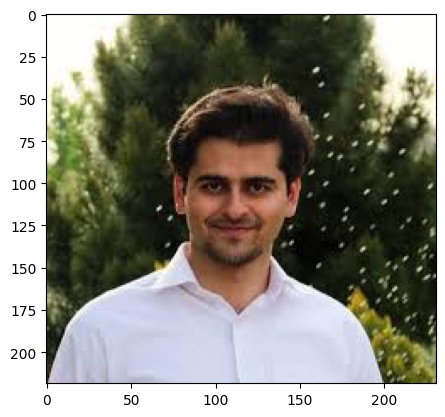

In [ ]:
input_image = cv2.imread("/content/input_test.jpg")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)
plt.show()

In [ ]:
results = app.get(input_image)

In [ ]:
face_bank = np.load("/content/face_bank.npy",allow_pickle=True)

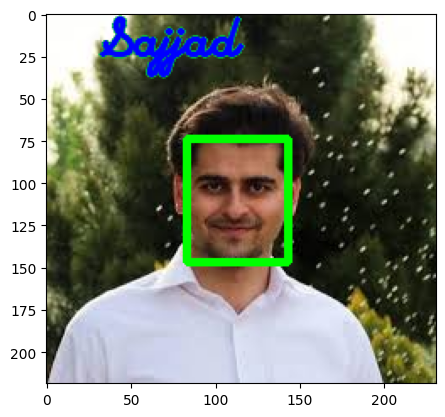

In [ ]:
threshold = 25

for result in results:
    cv2.rectangle(input_image,(int(result.bbox[0]),int(result.bbox[1])),(int(result.bbox[2]),int(result.bbox[3])),(0,255,0),4)
    for person in face_bank:
        face_bank_person_embedding = person["embedding"]
        new_person_embedding = result["embedding"]

        distance = np.sqrt(np.sum((face_bank_person_embedding-new_person_embedding)**2))
        if distance < threshold:
            cv2.putText(input_image,person["name"],
            (int(result.bbox[0])-50,int(result.bbox[1])-50),
            cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1,(0,0,255),2,cv2.LINE_AA)
            break
    else:
        cv2.putText(input_image,"unkown",
        (int(result.bbox[0])-50,int(result.bbox[1])-50),
        cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1,(0,255,0),2,cv2.LINE_AA)


plt.imshow(input_image)
plt.show()